In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

In [3]:

data = pd.read_feather("./rerouting30/rerouting30")
input_vars = pd.read_csv("./rerouting30/input_parameters_rerouting30.csv")

In [7]:
factor_names = ["alpha","beta","gamma","epsilon","parallel_served_full"]

scenarios = np.array([ [1.0, 0.0, 7.0, 0.1, 6.0], # No social interaction; low visiting frequency
              [0.0, 1.0, 7.0, 0.1, 6.0],
              [0.0, 1.0, 7.0, 1.0, 6.0], # Social interaction; low visiting frequency
              [0.0, 1.0, 3.0, 0.1, 7.8], # Social interaction; high visiting frequency
              [1.0, 0.0, 3.0, 0.1, 7.8]]) # Particular to capacity analysis icm queuing

In [4]:
q_sum = list()
n_facs = 12
for j in input_vars.index:
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data[data.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

uc_endvals_dict = {}
for i in ["unsatisfied consumption","policy type","variation","allfacs","fac5","food waste","distance"]:
    uc_endvals_dict[i] = list()


for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
    uc_endvals_dict["fac5"].append( np.sum(data[data.o0==j].iloc[:,9]))
    uc_endvals_dict["allfacs"].append( q_sum[j] )
    uc_endvals_dict["food waste"].append(data.o2[data.o0==j].iloc[-1])
    uc_endvals_dict["distance"].append(data.o3[data.o0==j].iloc[-1])

    if input_vars.capacity_policy[j] > 0:
        uc_endvals_dict["policy type"].append(1)
        uc_endvals_dict["variation"].append(input_vars.capacity_policy[j])
    elif input_vars.rerouting_policy[j] > 0:
        uc_endvals_dict["policy type"].append(2)
        uc_endvals_dict["variation"].append(input_vars.rerouting_policy[j])
    else:
        uc_endvals_dict["policy type"].append(0)
        uc_endvals_dict["variation"].append(0)    

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars,uc_endvals_df],axis=1)

<ipython-input-33-66487925ffa6>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,100,6),fontsize=14)


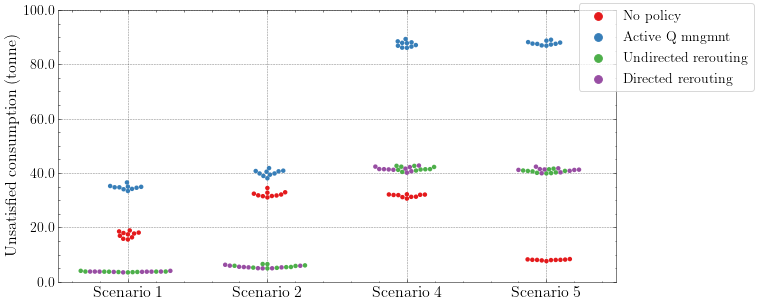

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

relevant_indices = [0,1,3,4]
relevant_scenarios = scenarios[ relevant_indices ]

# Modify DF for plot
storage_dict = {}
for s in range(len(relevant_scenarios)):
    tmp = input_vars_filtered
    
    for f in range(len(factor_names)):
        tmp = tmp[ tmp[factor_names[f]] == relevant_scenarios[s][f] ]
        
    tmp = pd.concat([tmp.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp))*s})],axis=1)
    storage_dict[s] = tmp
    
# Join dfs from dictionary 
tmp = pd.concat(storage_dict.values())

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="unsatisfied consumption", data=tmp,size=4.5,palette="Set1")

# x-axis
ax.set_xlabel(None)
xticklabels = ["Scenario %s"%(i+1) for i in relevant_indices]
ax.set_xticklabels(xticklabels,fontsize=16)

# y-axis
ax.set_ylim([0,100e3])
ax.set_yticklabels(np.linspace(0,100,6),fontsize=14)
ax.set_ylabel("Unsatisfied consumption (tonne)",fontsize=16)

# grid
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]
labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]
ax.legend(handles[:4],labels,loc='upper left',fontsize=14,bbox_to_anchor=(0.92, 1.05),framealpha=0.75);

plt.savefig("/home/daan/Desktop/results_uc_rerouting.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-34-393c18ae386d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(np.linspace(0,0.5,6),1),fontsize=14)


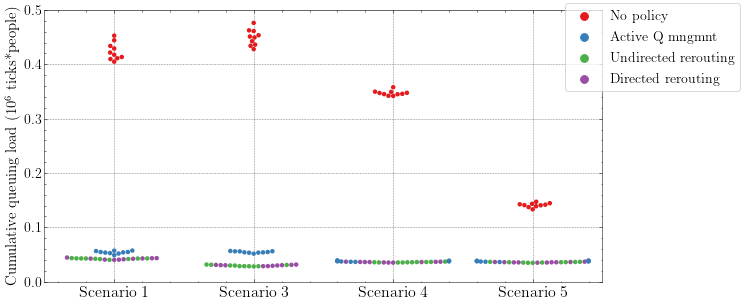

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

relevant_indices = [0,2,3,4]
relevant_scenarios = scenarios[ relevant_indices ]

# Modify DF for plot
storage_dict = {}
for s in range(len(relevant_scenarios)):
    tmp = input_vars_filtered
    
    for f in range(len(factor_names)):
        tmp = tmp[ tmp[factor_names[f]] == relevant_scenarios[s][f] ]
        
    tmp = pd.concat([tmp.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp))*s})],axis=1)
    storage_dict[s] = tmp
    
# Join dfs from dictionary 
tmp = pd.concat(storage_dict.values())

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="fac5", data=tmp,size=4.5,palette="Set1")

# x-axis
ax.set_xlabel(None)
xticklabels = ["Scenario %s"%(i+1) for i in relevant_indices]
ax.set_xticklabels(xticklabels,fontsize=16)

# y-axis
ax.set_ylim([0,500e3])
ax.set_yticklabels(np.round(np.linspace(0,0.5,6),1),fontsize=14)
ax.set_ylabel("Cumulative queuing load ($10^6$ ticks*people)",fontsize=15)

# grid
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]
labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]
ax.legend(handles[:4],labels,loc='upper left',fontsize=14,bbox_to_anchor=(0.92, 1.05),framealpha=0.75);

plt.savefig("/home/daan/Desktop/results_fac5_rerouting.png")

<ipython-input-35-4eec4823263d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(np.linspace(0,1.4,8),1),fontsize=14)


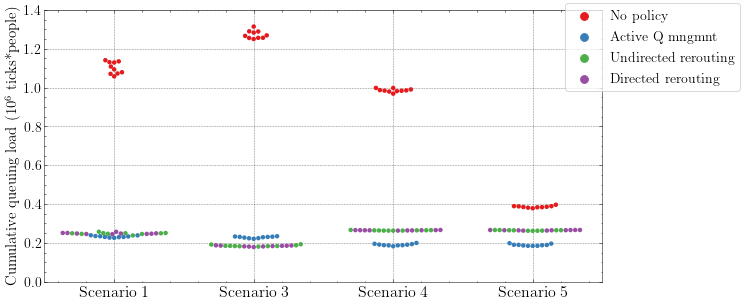

In [35]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

relevant_indices = [0,2,3,4]
relevant_scenarios = scenarios[ relevant_indices ]

# Modify DF for plot
storage_dict = {}
for s in range(len(relevant_scenarios)):
    tmp = input_vars_filtered
    
    for f in range(len(factor_names)):
        tmp = tmp[ tmp[factor_names[f]] == relevant_scenarios[s][f] ]
        
    tmp = pd.concat([tmp.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp))*s})],axis=1)
    storage_dict[s] = tmp
    
# Join dfs from dictionary 
tmp = pd.concat(storage_dict.values())

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="allfacs", data=tmp,size=4.5,palette="Set1")

# x-axis
ax.set_xlabel(None)
xticklabels = ["Scenario %s"%(i+1) for i in relevant_indices]
ax.set_xticklabels(xticklabels,fontsize=16)

# y-axis
ax.set_ylim([0,1.4e6])
ax.set_yticklabels(np.round(np.linspace(0,1.4,8),1),fontsize=14)
ax.set_ylabel("Cumulative queuing load ($10^6$ ticks*people)",fontsize=15)

# grid
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]
labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]
ax.legend(handles[:4],labels,loc='upper left',fontsize=14,bbox_to_anchor=(0.92, 1.05),framealpha=0.75);

plt.savefig("/home/daan/Desktop/results_allfacs_rerouting.png")

<ipython-input-36-36fad4c9da0e>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(np.linspace(0,1,6),1),fontsize=14)


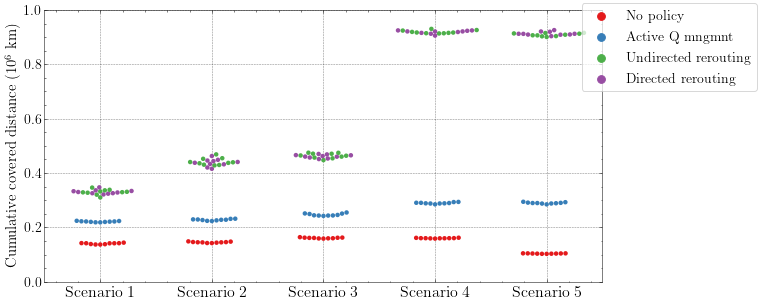

In [36]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

relevant_indices = [0,1,2,3,4]
relevant_scenarios = scenarios[ relevant_indices ]

# Modify DF for plot
storage_dict = {}
for s in range(len(relevant_scenarios)):
    tmp = input_vars_filtered
    
    for f in range(len(factor_names)):
        tmp = tmp[ tmp[factor_names[f]] == relevant_scenarios[s][f] ]
        
    tmp = pd.concat([tmp.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp))*s})],axis=1)
    storage_dict[s] = tmp
    
# Join dfs from dictionary 
tmp = pd.concat(storage_dict.values())

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="distance", data=tmp,size=4.5,palette="Set1")

# x-axis
ax.set_xlabel(None)
xticklabels = ["Scenario %s"%(i+1) for i in relevant_indices]
ax.set_xticklabels(xticklabels,fontsize=16)

# y-axis
ax.set_ylim([0,1e6])
ax.set_yticklabels(np.round(np.linspace(0,1,6),1),fontsize=14)
ax.set_ylabel("Cumulative covered distance ($10^6$ km)",fontsize=15)

# grid
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]
labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]
ax.legend(handles[:4],labels,loc='upper left',fontsize=14,bbox_to_anchor=(0.95, 1.05),framealpha=0.75);

plt.savefig("/home/daan/Desktop/results_distance_rerouting.png")